# Load packages

In [1]:
from cooltools.eigdecomp import cis_eig
import cooler
import numpy as np
import matplotlib.pyplot as plt

# Load data and use it to get eigenvector

In [2]:
cool = cooler.Cooler('data/K562_hg19_chr3_50K.cool')
mat = cool.matrix(balance=True)[:]

In [3]:
track = np.loadtxt('data/hg19_GC_chr3_50K.txt')
track

array([0.     , 0.16752, 0.23058, ..., 0.22148, 0.06538, 0.     ])

In [4]:
eigvals, eigvecs = cis_eig(mat, 1, track)
eigvec = eigvecs[0]
eigvec

array([        nan, -0.07931084,  0.08391484, ...,         nan,
               nan,         nan])

# Graph compartments and first eigenvector

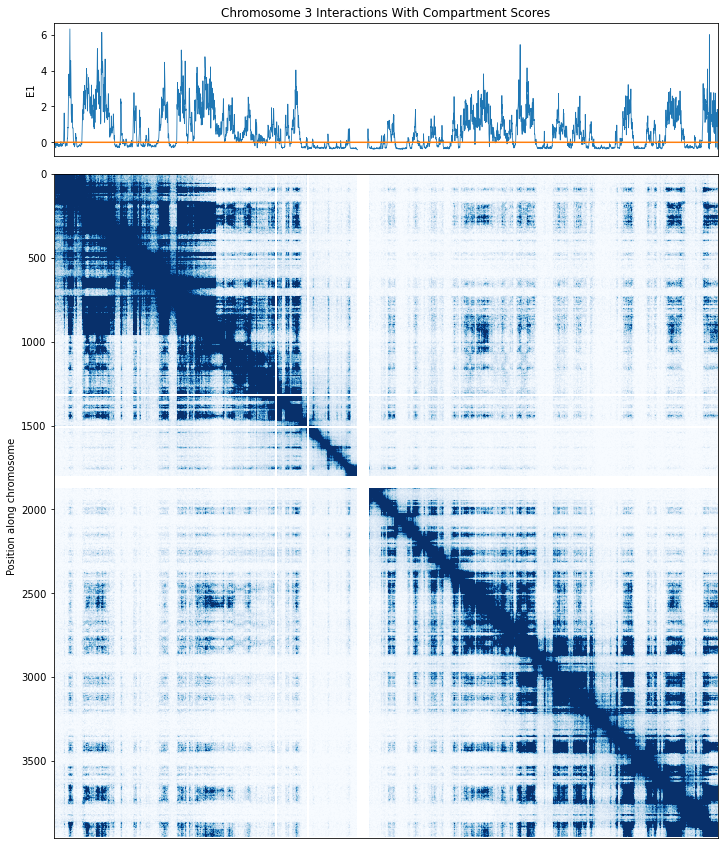

In [7]:
from mpl_toolkits.axes_grid import make_axes_locatable

fig, ax = plt.subplots(figsize=(20, 15))

ax.imshow(mat, cmap='Blues', vmax=1)
ax.set_ylabel('Position along chromosome')

divider = make_axes_locatable(ax)
ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
ax1.plot(eigvec, label='E1', linewidth=0.8)
ax1.plot(np.zeros(len(eigvec)))

ax1.set_ylabel('E1')
ax1.set_xticks([])
ax1.set_title('Chromosome 3 Interactions With Compartment Scores')

plt.savefig('heatmap.jpg')
plt.show()

# Making bed file

In [6]:
start = 0
idx = 0
last_num = -1
comp_num = 0

f=open('compartments.bed', 'w')
for num in eigvec:
    idx += 1
    if np.isnan(num):
        continue
    
    assert(num != 0) # Makes sure we can detect sign changes by multiplication
    
    if (num * last_num) < 0:
        start_pos = start * 50000
        end_pos = idx * 50000
        if last_num > 0:
            name = 'A' + str(comp_num)
            comp_num += 1
            score = 'A'
        elif last_num < 0:
            name = 'B' + str(comp_num)
            score = 'B'
        else:
            assert(False)
        
        f.write('chr3\t{}\t{}\t{}\t{}\t+\n'.format(start_pos, end_pos, name, score))
        last_num = num
        start = idx

start_pos = end_pos
end_pos = len(eigvec) * 50000
assert(last_num < 0)
name = 'B' + str(comp_num)
score = 'B'
f.write('chr3\t{}\t{}\t{}\t{}\t+\n'.format(start_pos, end_pos, name, score))

f.close()